# Linear Regression with SciKit-Learn

---
# Imports

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
# Sample Data

In [35]:
df = pd.read_csv('data/Advertising.csv')

In [36]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Expanding the Questions

Previously, we explored **Is there a relationship between *total* advertising spend and *sales*?** as well as predicting the total sales for some value of total spend. Now we want to expand this to **What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?**

### Multiple Features (N-Dimensional)

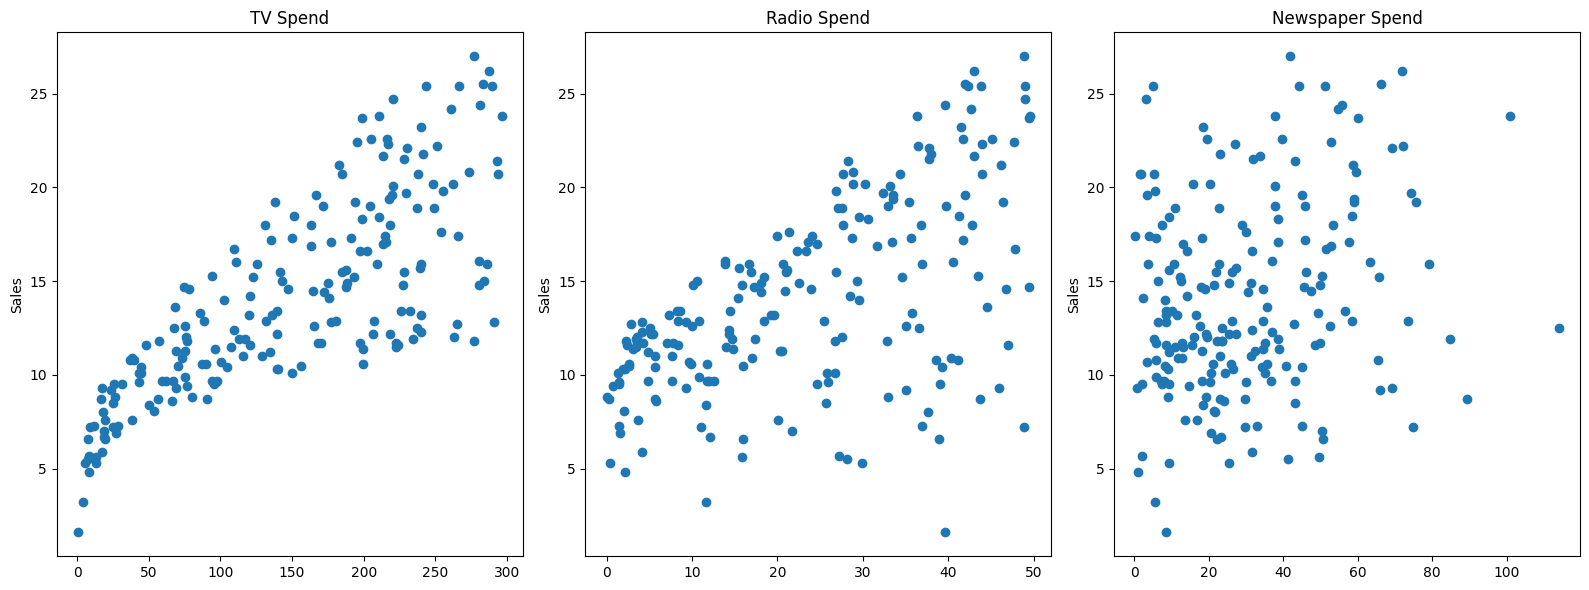

In [37]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

# We can use sns.pairplot to visualize the relationships between all variables
# sns.pairplot(df);

---
## Correlation Analysis

TV spend shows the highest correlation with sales, followed by radio, then newspaper spend.

In [38]:
# X = df[['TV','radio','newspaper']] # Features
# or using smarter way
X = df.drop('sales',axis=1)
y = df['sales']  # Target variable

---
## Introducing SciKit Learn

In [39]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets, we can use shuffle=True by default
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, shuffle=True) # 80% training and 20% test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140, 3)
X_test shape: (60, 3)
y_train shape: (140,)
y_test shape: (60,)


In [40]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [41]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

---
## Creating a Model (Estimator)

#### Import a model class from a model family

In [67]:
from sklearn.linear_model import LinearRegression

#### Create an instance of the model with parameters

In [71]:
model = LinearRegression()

### Fit/Train the Model on the training data

* **Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

In [75]:
# help(model)
model.fit(X_train,y_train)  # fit the model to the training data, what it actually does is to find the best coefficients (weights) for each feature

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


---
## Evaluation Metrics for Regression Problems

The 3 most common evaluation metrics for regression problems are:

### 1. Mean Absolute Error (MAE)
- **Description**: Calculates the average absolute difference between predicted and actual values
- **Formula**: MAE = (1/n) * Σ |y_i - ŷ_i|
- **Pros**: Easy to understand and interpret
- **Cons**: Does not differentiate between small and large errors

### 2. Mean Squared Error (MSE)
- **Description**: Average of squared differences between predicted and actual values; penalizes larger errors more
- **Formula**: MSE = (1/n) * Σ (y_i - ŷ_i)²
- **Pros**: Penalizes larger errors more, useful for certain applications
- **Cons**: Heavily influenced by outliers due to squaring

### 3. Root Mean Squared Error (RMSE)
- **Description**: Square root of MSE; provides interpretable error in target variable units
- **Formula**: RMSE = √MSE = √((1/n) * Σ (y_i - ŷ_i)²)
- **Pros**: Provides interpretable error in same units as target variable
- **Cons**: Also heavily influenced by outliers

**Note**: These metrics apply to any regression problem, not just linear regression. The choice of metric depends on the problem context and target variable scale.

In [74]:
test_predictions = model.predict(X_test)  # make predictions on the test set

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
df['sales'].mean()

np.float64(14.0225)

<Axes: xlabel='sales', ylabel='Count'>

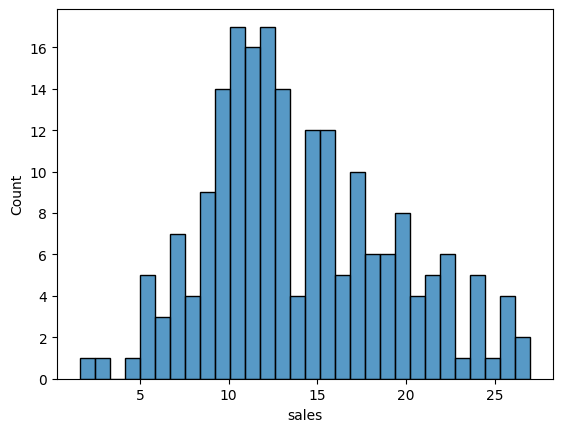

In [46]:
sns.histplot(data=df, x='sales', bins=30)

#### **MAE**, this number means that on average, our model's predictions are off by about 1.21 units of sales, with respect to the average sales value of 14.02 units it is a good result, which means about 8.6% error.

#### Actually it means I am off by 1.21 from the actual average sales which is 14.02, by percentage it is (1.21/14.02)*100 = 8.6%

In [ ]:
mean_absolute_error(y_test, test_predictions) 

1.213745773614481

#### **MSE**, this number means that on average, the squared difference between our model's predictions and the actual sales values is about 2.29 units squared, I can't compare it to the average sales directly because it is squared value, to fix that we can use RMSE

In [76]:
print(f"The mean squared error (MSE) is: {mean_squared_error(y_test, test_predictions)}")

The mean squared error (MSE) is: 2.2987166978863796


#### **RMSE**, this number means that on average, our model's predictions are off by about 1.52 units of sales, with respect to the average sales value of 14.02 units it is a good result, which means about 10.9% error.

#### Actually it means I am off by 1.52 from the actual average sales which is 14.02, by percentage it is (1.52/14.02)*100 = 10.9%

#### Actually, it means that the standard deviation of the prediction errors (residuals) is about 1.52 units of sales.

In [77]:
print(f"The root mean squared error (RMSE) is: {np.sqrt(mean_squared_error(y_test, test_predictions))}")

The root mean squared error (RMSE) is: 1.5161519375993884


---
## Residual Analysis

Residuals are the differences between actual and predicted values. By analyzing residuals, we can determine if linear regression is an appropriate fit for our data.

**Key Insight**: If residuals are randomly distributed, the model is performing well. If there's a pattern in the residuals, it indicates the model is not capturing some information and could be improved.

In [49]:
test_residuals = y_test - test_predictions

In [50]:
# test_residuals

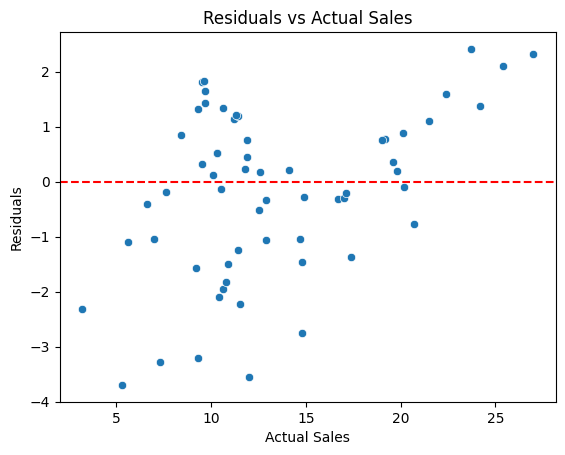

In [51]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Sales")
plt.show()

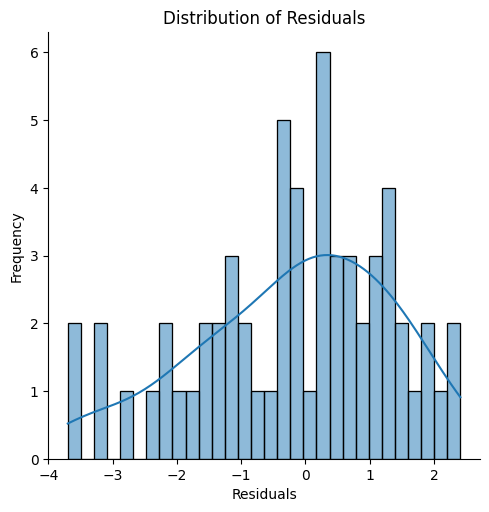

In [52]:
sns.displot(test_residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [53]:
import scipy as sp

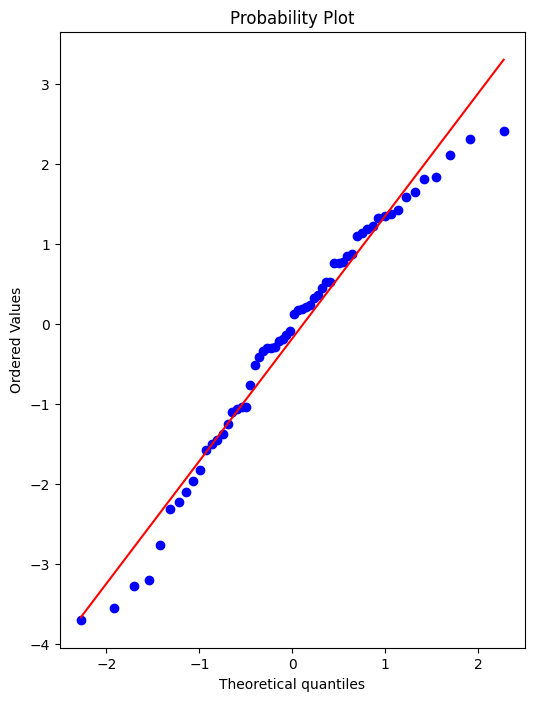

In [54]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals,plot=ax)
# The idea here is to see if the residuals follow a normal distribution or not, if they do, the points will fall approximately along the reference line, so the linear regression model is a good fit for the data

-----------

## Retraining Model on Full Data

If we're satisfied with the performance on the test data, before deploying our model to the real world, we should retrain on all our data. (If we were not satisfied, we could update parameters or choose another model, something we'll discuss later on).

In [55]:
final_model = LinearRegression() # Actually, it should be retrained on the whole dataset before using it in production, but in this case we will just use the same model trained on the training set as we didn't change anything

In [56]:
final_model.fit(X, y) # fit the model on the whole dataset

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


---
## Model Coefficients Interpretation

The newspaper feature has a very small coefficient, suggesting minimal impact on sales. Consider dropping it to simplify the model without significant accuracy loss.

**Coefficient Meanings** (change in sales for one-unit increase in each feature, holding others constant):

- **TV**: +0.0458 units in sales per unit TV spend
- **Radio**: +0.1885 units in sales per unit radio spend  
- **Newspaper**: -0.0012 units in sales per unit newspaper spend (negative relationship)

* **Note that**, in our example the features are in similar scales (thousands of dollars), so the coefficients can be interpreted directly. 

* However, for real-world datasets, the features might be in different units or scales, so it's important to consider feature scaling or normalization before training the model and interpreting the coefficients.

In [57]:
final_model.coef_ # get the coefficients (weights) for each feature which will be used in production

array([ 0.04576465,  0.18853002, -0.00103749])

---
## Deployment, Predictions, and Model Attributes

### Final Model Fit

* **Note**, we can only do this since we only have 3 features, for any more it becomes unreasonable.

In [78]:
y_hat = final_model.predict(X)

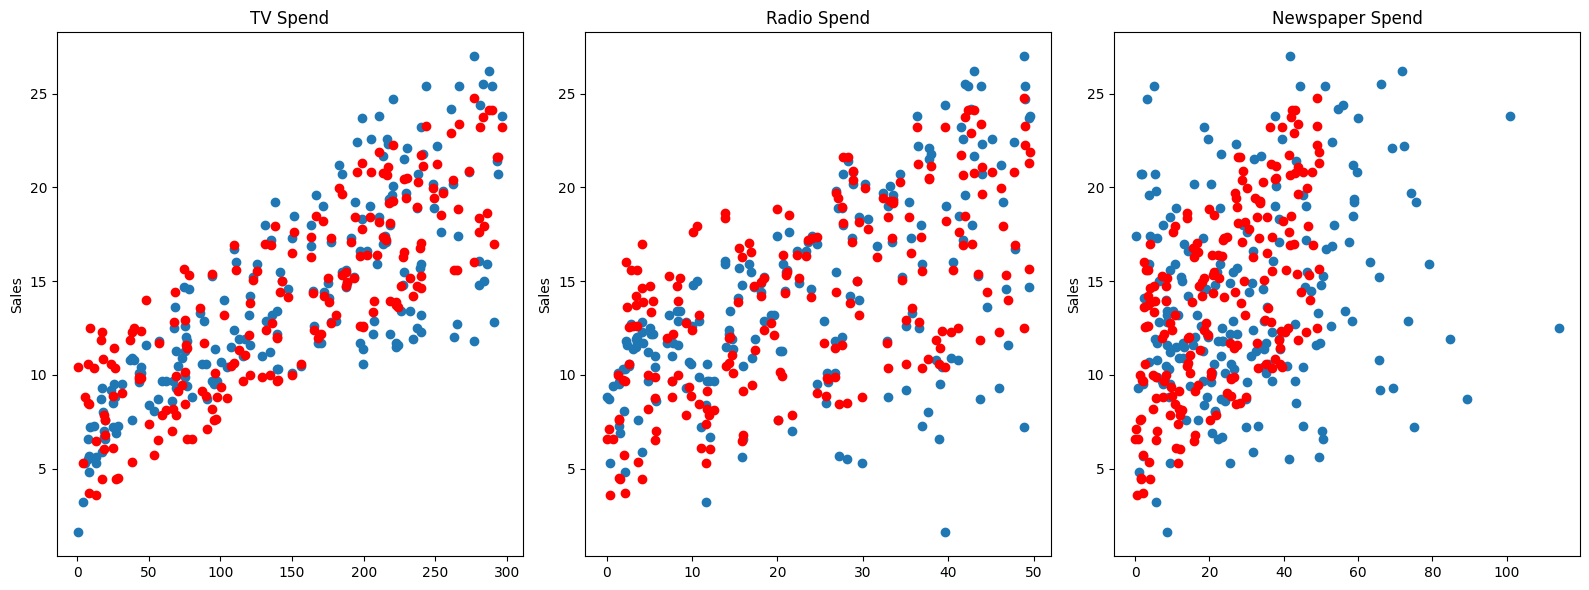

In [ ]:
# Here we can visualize the predictions vs actual sales for each feature

fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Residuals

Should be normally distributed

In [79]:
residuals = y_hat - y

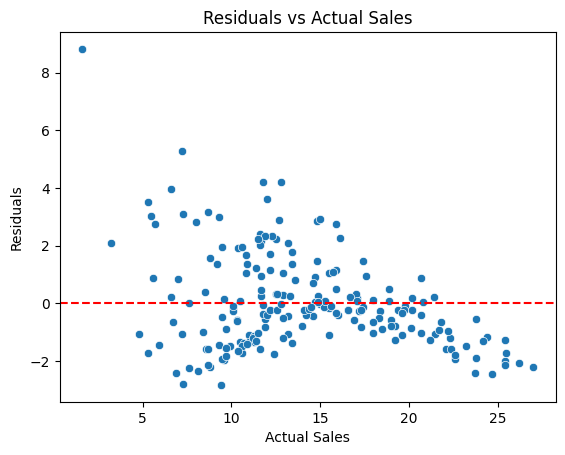

In [80]:
sns.scatterplot(x=y, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Sales")
plt.show()

-----

## Model Persistence (Saving and Loading a Model)

In [62]:
from joblib import dump, load
dump(final_model, 'final_sales_model.joblib')  # save the model to a file

['final_sales_model.joblib']

In [ ]:
loaded_model = load('final_sales_model.joblib')  # load the model from the file

loaded_model.coef_ # the same coefficients as final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [66]:
# 149 TV, 22 Radio, 12 Newspaper
campaign = [[149, 22, 12]]  # example campaign data
loaded_model.predict(campaign)  # predict the sales for this campaign

/home/ahmed-hemdan/PycharmProjects/ML-Workshop/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

---
## Summary: Complete Linear Regression Pipeline

### Workflow Completed:

1. **Data Exploration & Preparation**: Loaded advertising dataset and analyzed relationships between features (TV, Radio, Newspaper) and sales
2. **Feature Engineering**: Selected multiple features and prepared data for modeling
3. **Train-Test Split**: Partitioned data into training (70%) and testing (30%) sets
4. **Model Training**: Fitted LinearRegression model on training data using scikit-learn
5. **Model Evaluation**: Assessed performance using MAE, MSE, and RMSE metrics on test set
6. **Residual Diagnostics**: Validated model assumptions through residual analysis and normality testing
7. **Full Dataset Retraining**: Retrained final model on complete dataset for production deployment
8. **Coefficient Interpretation**: Analyzed feature impact on sales predictions
9. **Model Persistence**: Saved and loaded model for real-world deployment and inference

### Key Findings:

- **TV advertising** has the strongest positive impact on sales (coefficient: 0.0458)
- **Radio advertising** has moderate positive impact (coefficient: 0.1885)
- **Newspaper advertising** has minimal negative impact (coefficient: -0.0012)
- Model achieves ~8.6-10.9% error rate relative to average sales value
- Residuals are approximately normally distributed, validating model assumptions

### Next Steps:

Consider feature engineering, hyperparameter tuning, or exploring alternative models for potential performance improvements.